## 데이터

In [26]:
import pandas

In [68]:
from sklearn.decomposition import PCA

In [28]:
import seaborn

In [38]:
wine = pandas.read_csv('wine.csv')

## PCA

In [69]:
p = PCA()

In [70]:
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- 설명된 분산이 1이상인 축만 남긴다. 아래의 경우에는 3개만 남기면 됨 

In [71]:
p.explained_variance_ # 13차원 

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [39]:
pca = PCA(n_components=2) #2차원 데이터로 만들기 위해 컴포턴트 2 (원래 와인은 13 차원 -> 2차원)

In [40]:
score = pca.fit_transform(wine.iloc[:, 1:])

In [41]:
pca.explained_variance_ratio_ #설명된 분산의 비율 = r 제곱 (전체 분산 중에 몇%가 이 걸로 설명되느냐 )
# 첫번째 차원 99.8% , 두번째 차원 0.17% -> 거의 첫번째 차원만 보고 한 줄로 세울 수 있음 (첫번째 데이터만 있으면 나머지 99.8% 설명 가능 )
# ratio는 이것을 전체 분산으로 나눈 것 

array([0.99809123, 0.00173592])

### 시각화
- 표 형태로 변환하고 컬럼 이름을 comp1, comp2라고 붙인다
- wine의 종류(class) 정보를 가져와서 붙인다 
- wine 종류별로 색깔을 달리해서 2차원에 그려본다

In [42]:
score_df = pandas.DataFrame(score, columns=['Comp1', 'Comp2'])

In [43]:
score_df['Class'] = wine['Class']

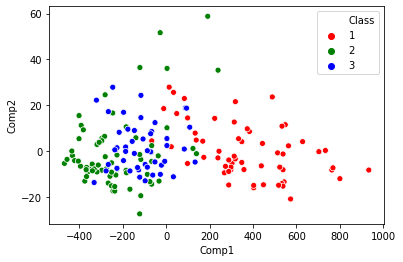

In [44]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

# 정규화 후 pca

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()

In [59]:
x=scale.fit_transform(wine.iloc[:,1:]) # fit : 파라미터 추정, transfrom: 변환 -> 축소된 차원 점수 

# PCA

In [60]:
sp = PCA(n_components=2)

In [ ]:
score2 = sp.fit_transform(x) # fit : 파라미터 추정(컴포넌트 찾기), transfrom: 변환 -> 축소된 차원 점수 

### 위의 과정은 다음과 같이 나눠서 할 수도 있다. 만약 새로운 와인 데이터를 구했다면 transform만 실시 

In [61]:
sp.fit(x)
score2 = sp.transform(x)

In [62]:
sp.explained_variance_ratio_ 

array([0.36198848, 0.1920749 ])

In [63]:
score_df1 = pandas.DataFrame(score2, columns=['Comp1', 'Comp2'])

In [64]:
score_df1['Class'] = wine['Class']

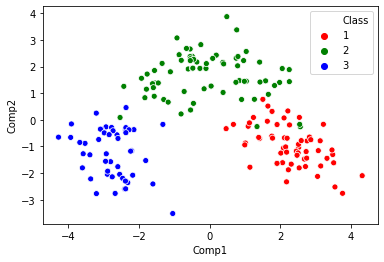

In [66]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df1, palette=['r', 'g', 'b'])
# 정규화 전보다 그림이 더 구분 잘 되게 나타남 

# 일차원 그래프로 만들기 

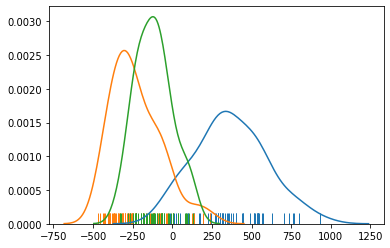

In [77]:
import numpy
# c는 1부터 3까지 
for c in range(1,4):
    # wine의 class 컬럼에 따라 score를 뽑아낸다
    d = numpy.extract(wine['Class'] == c , score[:,0])
    # 해당 socre의 밀도를 시각화한다 
    seaborn.distplot(d, rug=True, hist=False)

In [79]:
for c in range(1,4):
    d = score_df.query{f'Class == {c}'}['Comp1']
    seaborn.distplot(d, rug=True, hist=False)

SyntaxError: invalid syntax (<ipython-input-79-9e2820c27e6b>, line 2)

### 실습: hsb2.csv
- 다섯 과목을 pca해서 2차원에 시각화하고, 성별(female)에 따라 시각화 해보세요

In [102]:
hsb = pandas.read_csv('hsb2.csv')

In [103]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [ ]:
# 선생님 풀이 

In [127]:
pca = PCA(n_components=2)

In [129]:
hsb.iloc[:,6:]
# 다른 방법 : hsb[['read','wirte','math','science','socst']]

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61
2,44,33,54,58,31
3,63,44,47,53,56
4,47,52,57,53,61
5,44,52,51,63,61
6,50,59,42,53,61
7,34,46,45,39,36
8,63,57,54,58,51
9,57,55,52,50,51


In [130]:
score = pca.fit_transform(hsb.iloc[:,6:])

In [131]:
pca.explained_variance_ratio_

array([0.67506211, 0.11941715])

In [134]:
score_df= pandas.DataFrame(score, columns=['Comp1','Comp2'])

In [135]:
score_df['female']=hsb['female']

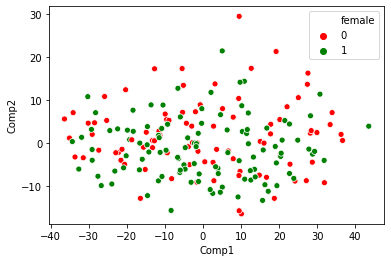

In [139]:
seaborn.scatterplot('Comp1','Comp2', hue='female', data=score_df,  palette=['r', 'g' ])

In [ ]:
# 내 풀이 

In [87]:
hsb1 = hsb.fit_transform(x)

In [90]:
hsb.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [92]:
hsb2 = pandas.DataFrame(hsb1, columns=['Comp1', 'Comp2'])

In [106]:
hsb2.head()

,Comp1,Comp2,Class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [109]:
hsb2['Class'] = hsb['female']

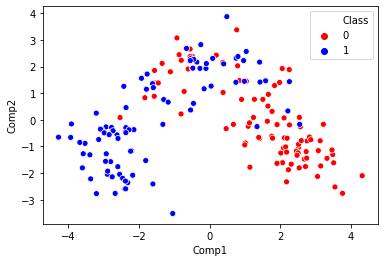

In [113]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=hsb2, palette=['r', 'b'])

## NMF

In [140]:
from sklearn.decomposition import NMF

In [141]:
nmf = NMF(n_components=2)

In [188]:
score = nmf.fit_transform(hsb[['read', 'write', 'math', 'science', 'socst']])

In [147]:
score #무조건 양수로 나옴 

array([[2.15599754, 1.48927056],
       [2.85954204, 1.31813185],
       [2.63526129, 0.01331062],
       [2.41169948, 1.24293257],
       [2.40152527, 1.40153284],
       [2.51101483, 1.2374375 ],
       [2.24673453, 1.55802667],
       [1.96985854, 0.72274037],
       [2.79968423, 0.99955841],
       [2.49548846, 1.14636001],
       [2.40165354, 1.41976959],
       [2.75272354, 1.35644502],
       [3.0500228 , 1.64236896],
       [2.78026751, 0.87398699],
       [1.83667782, 1.72449973],
       [2.08390692, 1.3291156 ],
       [2.2901941 , 1.30705772],
       [2.77364764, 1.1430705 ],
       [2.85900503, 1.46173061],
       [2.56013813, 0.73793068],
       [2.73771325, 0.51979583],
       [3.34713456, 1.20817863],
       [2.25434773, 1.16403895],
       [2.73497581, 1.265496  ],
       [1.8739271 , 1.10088126],
       [1.97394618, 0.45570394],
       [2.97696363, 1.50461291],
       [2.72939589, 0.75772313],
       [1.9690774 , 1.04228044],
       [2.54138726, 0.58912882],
       [2.

In [143]:
nmf.reconstruction_err_
# 재구성할때의 오류 (원 데이터를 재구성할 때 오차가 이 만큼 난다.) 
# (score @ nmf.components_ 값 에서 - hsb[['read', 'write', 'math', 'science', 'socst']**2).sum() 식으로 구성 가능 

143.12732842523724

In [144]:
nmf.components_
# 첫번째 행 : 컴포넌트 1 - 순서대로 read, write, math, science, socst 인데 컴프1은 공동적으로 영향을 미친다
# 두번째 행 : 컴포넌트 2 - science는 compo2에 전혀 영향을 미치지 않는다, 사회에 굉장히 영향을 미침 (+이기 때문에 큰 숫자일수록 영향을 많이 미친다)
# 1행 과목 값*comp1 값 + 1행 과목 값*comp2의 값 => 원 점수 복원값 

array([[17.10271518, 16.15759752, 18.78260808, 21.04648333, 10.11797503],
       [ 8.97102696, 11.34934325,  5.56484605,  0.        , 24.19692873]])

In [149]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [148]:
score @ nmf.components_ # @ : 행렬의 곱셈
# score값과 계수 값을 곱하면 나오는 거 -> hab.head 에서 보듯이 비슷하게 복원되어서 나옴 

array([[50.23369812, 51.73798321, 48.78281813, 45.37616621, 57.85010278],
       [60.73092935, 61.16326015, 61.04485817, 60.18330377, 60.82751741],
       [45.18953311, 42.730558  , 49.57115147, 55.46298272, 26.98558397],
       [52.39699097, 53.07373799, 52.21473462, 50.75779297, 54.476666  ],
       [53.64579155, 54.70935601, 52.9062224 , 50.54366152, 58.21136294],
       [54.04625658, 54.6160699 , 54.04955657, 52.84803169, 55.34857235],
       [52.40236007, 53.9844118 , 50.86971277, 47.28586091, 60.43186417],
       [40.17365298, 40.03081009, 41.02101992, 41.45859502, 37.41907682],
       [56.84926744, 56.5805025 , 58.14776034, 58.92350749, 52.51337877],
       [52.96365486, 53.33153134, 53.25109864, 52.52125623, 52.9876813 ],
       [53.81158765, 54.91840363, 53.01011633, 50.54636115, 58.65393401],
       [59.24775149, 59.87215917, 59.25173508, 57.93515003, 60.67379155],
       [66.89740748, 67.92084994, 66.42691334, 64.19225403, 70.60033924],
       [55.39068427, 54.84162186, 57.0

### 실습: med.csv

In [229]:
med = pandas.read_csv('med.csv')
med.head()

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,0,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,1,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,2,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,3,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,4,A,1,F,3.53,3.38,9,11,4.0,11,35,11


In [159]:
med.isnull().sum()

Unnamed: 0    0
Accept        0
Acceptance    0
Sex           0
BCPM          0
GPA           0
VR            0
PS            0
WS            1
BS            0
MCAT          0
Apps          0
dtype: int64

### imputation : 경측된 값 예측 + 채워넣는
### listwise deletion : 통째로 ( 행 단위로) 지우기 
- 장점 : 쉽다 (그냥 지우면 되니까) 
- 단점 : 이유 있시 결측된 값들은..? 

In [214]:
# med.dropna(axis = 0) #nan 값 삭제하기 
# med.isnull().sum()

Unnamed: 0    0
Accept        0
Acceptance    0
Sex           0
BCPM          0
GPA           0
VR            0
PS            0
WS            0
BS            0
MCAT          0
Apps          0
dtype: int64

In [215]:
nmf = NMF(n_components=2)
score = nmf.fit_transform(med.iloc[:,4:11])

In [217]:
nmf.reconstruction_err_

14.471446039174573

In [218]:
nmf.components_

array([[ 1.55771563,  1.57804256,  4.5511405 ,  4.53718552,  0.81266216,
         4.55627979, 14.56524813],
       [ 0.19592876,  0.20354392,  0.        ,  0.        ,  8.05259427,
         0.        ,  7.69862663]])

In [230]:
# 선생님 방식 
med.dropna(inplace=True) #med에서 빈 값이 있는 행을 없애고 다시 med에 덮어쓴다 
nmf = NMF(n_components=2)
score = nmf.fit_transform(med.iloc[:,4:11])
nmf.components_

array([[ 1.47150289,  1.45637616,  3.00656129,  4.36957985,  2.56738169,
         4.53278833, 14.49959593],
       [ 0.37098128,  0.47184245,  4.13092151,  0.40023626,  1.99304915,
         0.        ,  6.45815307]])

In [183]:
# 지능검사 데이터 
test1 = pandas.read_csv('test1.csv')
test1.head()

,Visual,Cubes,Lozenges,Comprehension,Completion,Word,Addition,Counting,Curve
0,23,19,4,10,17,10,69,82,156
1,33,22,17,8,17,10,65,98,195
2,34,24,22,11,19,19,50,86,228
3,29,23,9,9,19,11,114,103,144
4,16,25,10,8,25,24,112,122,160


In [226]:
nmf = NMF(n_components=3) # 시각, 언어, 수치 적인거 3가지쯤 되겠다
score = nmf.fit_transform(test1)
score

array([[3.23260495, 1.06156129, 0.70660449],
       [4.1413897 , 0.5758963 , 0.95310696],
       [4.92011565, 0.        , 0.12336506],
       [2.82217819, 2.6047723 , 1.31087826],
       [3.16814365, 2.43546809, 1.84716953],
       [4.17529747, 1.50552678, 1.17861018],
       [6.98995022, 1.73302571, 0.13218555],
       [3.5465243 , 1.80693047, 0.76405885],
       [4.02179453, 1.84188426, 1.18311094],
       [3.64356533, 1.56108902, 0.99318306],
       [2.76675858, 1.76117844, 1.84446803],
       [3.05546887, 2.07248056, 2.67958456],
       [4.2169519 , 1.11021005, 1.13765658],
       [2.89449453, 2.14001084, 0.71300519],
       [3.74573225, 0.21931773, 0.8681089 ],
       [2.61615143, 1.09099764, 1.15719154],
       [3.99542988, 0.61900778, 1.72307382],
       [4.76851001, 0.62044109, 0.75551269],
       [3.29301492, 1.81408768, 1.57423795],
       [4.36601308, 1.08335634, 0.84024463],
       [2.27347607, 2.5684673 , 0.75459068],
       [4.76956403, 1.09117441, 1.28499347],
       [3.

In [227]:
nmf.reconstruction_err_

174.58436328573916

In [228]:
nmf.components_

array([[ 6.59158238,  4.99410224,  3.73114927,  2.14075511,  3.86137344,
         3.75694414, 10.84329293, 16.85458233, 46.26254416],
       [ 0.        ,  0.9539786 ,  0.        ,  0.91956851,  1.6898408 ,
         1.53789028, 30.92109207,  9.63197845,  5.47514016],
       [ 2.59829099,  2.5748733 ,  1.03573959,  0.        ,  0.67266017,
         0.        ,  1.89958291, 23.9769001 ,  0.        ]])

### 컴포넌트 개수는 어떻게 정해야하는 가? 
- 일단 pca 할 때 표준화를 한번 하기 
- 1보다 큰 값들을 세기 (통상적인 기준) -> 설명되는 분산이 1보다 큰 게 몇개냐, 그래서 그 개수로 정하기 

In [236]:
pca = PCA()

In [237]:
scale=StandardScaler()
x = scale.fit_transform(test1)

In [239]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [242]:
pca.explained_variance_ 
# 1보다 큰 애들 3개  -> 그래서 컴포넌트 3 (n_components=3)

array([3.6397564 , 1.5731283 , 1.25920295, 0.71169667, 0.53641336,
       0.42424778, 0.36053782, 0.30005605, 0.25746066])

## 요인 분석

### 설치

In [17]:
# !pip install factor_analyzer

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/52/ff/912fe03a623a70bcf297d466013a0b4f4c68c3b60f86bf226682d061fc09/pandas-0.24.2-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
     |████████████████████████████████| 8.3MB 357kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
ERROR: matplotlib 1.3

### 탐색적 요인 분석

In [175]:
# test1 = 지능검사 데이터
test1 = pandas.read_csv('test1.csv')

In [176]:
test1.head()

,Visual,Cubes,Lozenges,Comprehension,Completion,Word,Addition,Counting,Curve
0,23,19,4,10,17,10,69,82,156
1,33,22,17,8,17,10,65,98,195
2,34,24,22,11,19,19,50,86,228
3,29,23,9,9,19,11,114,103,144
4,16,25,10,8,25,24,112,122,160


### 요인 수

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
# 요인 = comp(컴포넌트) 다 같은 말 
pc = PCA()

In [180]:
std = StandardScaler()
x = std.fit_transform(test1)

In [181]:
pc.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [182]:
pc.explained_variance_

array([3.6397564 , 1.5731283 , 1.25920295, 0.71169667, 0.53641336,
       0.42424778, 0.36053782, 0.30005605, 0.25746066])

### 요인분석

In [244]:
from factor_analyzer import FactorAnalyzer

In [245]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation=None) 
# n_facotrs = n_components
# method ='ml' 기본값 (그냥 해주세요,,,)
# rotation(회전) = 지금은 안하고 돌림 (none)

In [251]:
test1.head()

,Visual,Cubes,Lozenges,Comprehension,Completion,Word,Addition,Counting,Curve
0,23,19,4,10,17,10,69,82,156
1,33,22,17,8,17,10,65,98,195
2,34,24,22,11,19,19,50,86,228
3,29,23,9,9,19,11,114,103,144
4,16,25,10,8,25,24,112,122,160


In [246]:
fa.fit(test1)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

In [250]:
fa.loadings_ #.components_ 같은 말 == 계수 - rotation을 안 해서 지금 +- 섞여있고 해석하기 어려움 

array([[ 0.5195586 ,  0.16175193,  0.45309719],
       [ 0.32602019,  0.08272212,  0.38326485],
       [ 0.48792282,  0.07938354,  0.46943603],
       [ 0.80764204, -0.31831824, -0.07341938],
       [ 0.79325455, -0.21424007, -0.15082868],
       [ 0.76449516, -0.30110151, -0.05750829],
       [ 0.41831061,  0.54127836, -0.37907985],
       [ 0.41926555,  0.70942402, -0.06367509],
       [ 0.5730377 ,  0.43495822,  0.16127767]])

In [247]:
fa.get_communalities() # 우리가 봐야하는 중요한 값! communalities 
# 비쥬얼, 큐브, 로직, 컴프리헨션 ...컬럼명들의 데이터에서 이 요인들이 분산의 몇 %를 설명하느냐가 중요 

array([0.50140189, 0.26002406, 0.46474061, 0.75900258, 0.69790088,
       0.67842217, 0.61166757, 0.68312056, 0.54357134])

In [258]:
fa.get_uniquenesses() #요인들의 유니크한 부분 

array([0.49859811, 0.73997594, 0.53525939, 0.24099742, 0.30209912,
       0.32157783, 0.38833243, 0.31687944, 0.45642866])

In [257]:
fa.get_eigenvalues()

(array([3.61465463, 1.56227914, 1.2505188 , 0.70678842, 0.53271396,
        0.42132193, 0.35805136, 0.2979867 , 0.25568507]),
 array([ 3.22652465,  1.2267954 ,  0.74846837,  0.13449199,  0.04094136,
        -0.00569107, -0.01807991, -0.06076226, -0.09283687]))

### 회전

In [261]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation='promax')

In [262]:
fa.fit(test1)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=3, rotation='promax', rotation_kwargs={},
               use_smc=True)

In [263]:
fa.phi_ #요인간 상관 행렬

array([[1.        , 0.30959565, 0.47944114],
       [0.30959565, 1.        , 0.42381188],
       [0.47944114, 0.42381188, 1.        ]])

### 확인적 요인분석

In [264]:
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

#### 모형

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
std_test = pandas.DataFrame(x, columns=test1.columns)

In [288]:
model_dict = {
    '시각': ['Visual', 'Cubes', 'Lozenges'], # 미리 이름 붙이기 : 시각
    '언어': ['Comprehension', 'Completion', 'Word'], # 언어
    '수리': ['Addition', 'Counting', 'Curve'] # 수리
}

In [289]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(
    std_test,
    model_dict)

#### 분석

In [290]:
cfa = ConfirmatoryFactorAnalyzer(model_spec)

In [291]:
cfa.fit(std_test)

ConfirmatoryFactorAnalyzer(bounds=None, disp=True, impute='median',
                           is_cov_matrix=False, max_iter=200, n_obs=145,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x11e844d90>,
                           tol=None)

In [271]:
cfa.loadings_
# 요인 1, 요인 2, 요인 3이 각각 영향을 미친다는 가정에 맞게 계수를 추정해줌 

array([[0.67664931, 0.        , 0.        ],
       [0.51650872, 0.        , 0.        ],
       [0.69358181, 0.        , 0.        ],
       [0.        , 0.86556653, 0.        ],
       [0.        , 0.82932928, 0.        ],
       [0.        , 0.82633551, 0.        ],
       [0.        , 0.        , 0.65912667],
       [0.        , 0.        , 0.79587079],
       [0.        , 0.        , 0.70084294]])

In [292]:
cfa.factor_varcovs_

array([[1.        , 0.54066446, 0.52334592],
       [0.54066446, 1.        , 0.33613297],
       [0.52334592, 0.33613297, 1.        ]])

#### 적합도

In [273]:
cfa.aic_

3351.2051178337597

In [274]:
cfa.bic_

3503.018538697209

## 다차원척도법

### 데이터 준비

In [275]:
import numpy

In [276]:
df = pandas.DataFrame(
    [
        ['A', 'B', 3],
        ['A', 'C', 4],
        ['B', 'C', 5],
    ])

In [277]:
distance = numpy.zeros((3, 3))
product_id = {'A': 0, 'B': 1, 'C': 2}

In [278]:
for i, row in df.iterrows():
    p1 = row[0]
    i1 = product_id[p1]
    
    p2 = row[1]
    i2 = product_id[p2]
    
    distance[i1, i2] = row[2]    

In [279]:
distance

array([[0., 3., 4.],
       [0., 0., 5.],
       [0., 0., 0.]])

In [280]:
distance = distance + distance.T

In [281]:
distance

array([[0., 3., 4.],
       [3., 0., 5.],
       [4., 5., 0.]])

### 분석

In [282]:
from sklearn.manifold import MDS

In [283]:
mds = MDS(metric=False, dissimilarity='precomputed')

In [284]:
pos = mds.fit_transform(distance)

In [285]:
pos

array([[-0.00476629, -0.35994948],
       [-0.33942238, -0.00922386],
       [ 0.34087861,  0.37225938]])

### 시각화

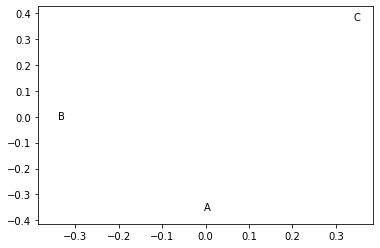

In [287]:
plt = seaborn.scatterplot(pos[:, 0], pos[:, 1], color='white')
for i, label in enumerate(['A', 'B', 'C']):
    plt.text(pos[i, 0], pos[i, 1], label)